In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
csv_in = 'ai-end2-2.csv'
df_all = pd.read_csv(csv_in, delimiter=',', skiprows=0, header=0)
print(df_all.shape)
print(df_all.info())
display(df_all.head())

(301, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      301 non-null    float64
 1   sex      301 non-null    float64
 2   bmi      301 non-null    float64
 3   bp       301 non-null    float64
 4   s1       301 non-null    float64
 5   s2       301 non-null    float64
 6   s3       301 non-null    float64
 7   s4       301 non-null    float64
 8   s5       301 non-null    float64
 9   s6       301 non-null    float64
 10  disease  301 non-null    float64
dtypes: float64(11)
memory usage: 26.0 KB
None


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease
0,-0.041840,-0.044642,0.128521,0.063187,-0.033216,-0.032629,0.011824,-0.039493,-0.015998,-0.050783,259.0
1,-0.034575,-0.044642,-0.037463,-0.060757,0.020446,0.043466,-0.013948,-0.002592,-0.030751,-0.071494,128.0
2,0.009016,0.050680,-0.005128,-0.064199,0.069981,0.083863,-0.039719,0.071210,0.039540,0.019633,116.0
3,0.001751,0.050680,0.026128,-0.009113,0.024574,0.038456,-0.021311,0.034309,0.009436,0.003064,196.0
4,0.016281,0.050680,0.014272,0.001215,0.001183,-0.021355,-0.032356,0.034309,0.074968,0.040343,220.0


In [3]:
df_all = df_all.dropna().reset_index(drop=True)
print(df_all.shape)
display(df_all.head())

(301, 11)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease
0,-0.041840,-0.044642,0.128521,0.063187,-0.033216,-0.032629,0.011824,-0.039493,-0.015998,-0.050783,259.0
1,-0.034575,-0.044642,-0.037463,-0.060757,0.020446,0.043466,-0.013948,-0.002592,-0.030751,-0.071494,128.0
2,0.009016,0.050680,-0.005128,-0.064199,0.069981,0.083863,-0.039719,0.071210,0.039540,0.019633,116.0
3,0.001751,0.050680,0.026128,-0.009113,0.024574,0.038456,-0.021311,0.034309,0.009436,0.003064,196.0
4,0.016281,0.050680,0.014272,0.001215,0.001183,-0.021355,-0.032356,0.034309,0.074968,0.040343,220.0


In [4]:
X_all = df_all.loc[:, 'age':'s6']  # explanatory variables
y = df_all['disease']  # objective variable
print('X_all:', X_all.shape)
print('y:', y.shape)

X_all: (301, 10)
y: (301,)


In [5]:
corr_all = X_all.corr(method='pearson')
display(corr_all)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.182007,0.241165,0.362701,0.276954,0.225288,-0.069723,0.208904,0.290484,0.316513
sex,0.182007,1.000000,0.127168,0.278612,0.016263,0.128457,-0.407684,0.359644,0.187496,0.259884
bmi,0.241165,0.127168,1.000000,0.454084,0.224651,0.235030,-0.382978,0.419787,0.453747,0.343799
bp,0.362701,0.278612,0.454084,1.000000,0.257924,0.226354,-0.235527,0.321974,0.400380,0.405793
s1,0.276954,0.016263,0.224651,0.257924,1.000000,0.883471,0.074353,0.519730,0.530880,0.302017
s2,0.225288,0.128457,0.235030,0.226354,0.883471,1.000000,-0.191171,0.646373,0.310598,0.268625
s3,-0.069723,-0.407684,-0.382978,-0.235527,0.074353,-0.191171,1.000000,-0.739316,-0.369902,-0.275441
s4,0.208904,0.359644,0.419787,0.321974,0.519730,0.646373,-0.739316,1.000000,0.617101,0.407248
s5,0.290484,0.187496,0.453747,0.400380,0.530880,0.310598,-0.369902,0.617101,1.000000,0.443077
s6,0.316513,0.259884,0.343799,0.405793,0.302017,0.268625,-0.275441,0.407248,0.443077,1.000000


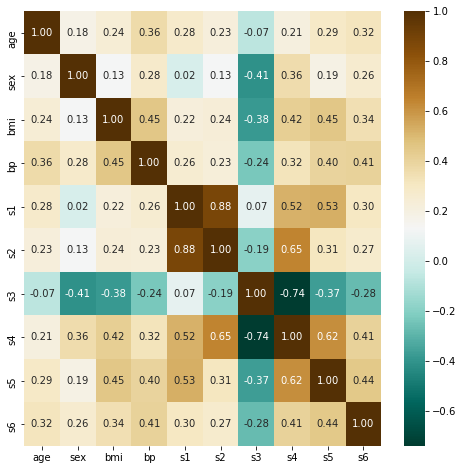

In [6]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_all,annot=True,fmt='.2f',cmap='BrBG_r')
plt.show()

In [7]:
X_all_c = sm.add_constant(X_all)
model = sm.OLS(y, X_all_c)
results = model.fit()
print('R2:', results.rsquared)
print('Adj R2:', results.rsquared_adj)
print('p-values (F-statistic)', results.f_pvalue)
print(results.summary())

R2: 0.5295180649280142
Adj R2: 0.5132945499255319
p-values (F-statistic) 5.245571859653978e-42
                            OLS Regression Results                            
Dep. Variable:                disease   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     32.64
Date:                Fri, 23 Jul 2021   Prob (F-statistic):           5.25e-42
Time:                        10:28:12   Log-Likelihood:                -1617.9
No. Observations:                 301   AIC:                             3258.
Df Residuals:                     290   BIC:                             3299.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [8]:
X_scaled = preprocessing.scale(X_all)
y_scaled = preprocessing.scale(y)
model = sm.OLS(y_scaled, X_scaled)
results = model.fit()
print('R2:', results.rsquared)
print('Adj R2:', results.rsquared_adj)
print('p-values (F-statistic)', results.f_pvalue)
print(results.summary())

R2: 0.529518064928014
Adj R2: 0.5133503008361932
p-values (F-statistic) 3.6467578835030694e-42
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.530
Model:                            OLS   Adj. R-squared (uncentered):              0.513
Method:                 Least Squares   F-statistic:                              32.75
Date:                Fri, 23 Jul 2021   Prob (F-statistic):                    3.65e-42
Time:                        10:28:12   Log-Likelihood:                         -313.62
No. Observations:                 301   AIC:                                      647.2
Df Residuals:                     291   BIC:                                      684.3
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    

In [9]:
def step_aic_forward(model, exog, endog, **kwargs):
    '''
    This function calculates the best subset of explanatory (exogenous) variables based on AIC.
    Both exog and endog can be either str or list.

    Arguments:
        model: model from statsmodels.formula.api
        exog (str or list): explanatory (exogenous) variables
        endog (str or list): objective (endogenous) variables
        kwargs: additional keyword argments for model (data, family, ...)

    Return values:
        model: a model with the smallest AIC
    '''

    # Convert exog, endog into 1-d list
    exog = np.r_[[exog]].flatten()
    endog = np.r_[[endog]].flatten()
    remaining = set(exog)
    selected = []  # Selected exogenous variables

    # First, calculate AIC with a constant (no exogs)
    formula_head = ' + '.join(endog) + ' ~ '
    formula = formula_head + '1'
    aic = model(formula=formula, **kwargs).fit().aic
    print('AIC: {:.3f}, formula: {}'.format(aic, formula))

    current_score, best_new_score = aic, aic

    # Break loop if all exogs are selected or no remaining exogs can improve AIC
    while True:
        score_with_candidates = []
        for candidate in remaining:
            # Calculate AIC for adding an exog one by one
            formula_tail = ' + '.join(selected + [candidate])
            formula = formula_head + formula_tail
            aic = model(formula=formula, **kwargs).fit().aic
            print('AIC: {:.3f}, formula: {}'.format(aic, formula))

            score_with_candidates.append((aic, candidate))

        # Select best_candidate with minimum AIC
        score_with_candidates.sort()
        best_score, best_candidate = score_with_candidates[0]

        # select best_candidate if AIC is improved
        improved = False
        if best_score < current_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_score
            improved = True
            
        if not remaining or not improved: break

    formula = formula_head + ' + '.join(selected)
    print('The best formula: {}'.format(formula))
    aic = model(formula=formula, **kwargs).fit().aic
    print('Minimum AIC: {:.3f}'.format(aic))
    return model(formula, **kwargs).fit()

# NOTE: make DataFrames corresponding to X_scaled and y_scaled.
dfX_scaled = pd.DataFrame(X_scaled, columns=X_all.columns)
dfy_scaled = pd.Series(y_scaled, name=y.name)
exog = list(dfX_scaled.columns)  # Initial set = all explanatory variables
endog = [dfy_scaled.name]  # Objective variables
df_scaled = pd.concat([dfX_scaled, dfy_scaled], axis=1)
results_aic=step_aic_forward(smf.ols, exog, endog, data=df_scaled)

AIC: 856.201, formula: disease ~ 1
AIC: 841.833, formula: disease ~ s1
AIC: 815.520, formula: disease ~ s3
AIC: 714.765, formula: disease ~ bmi
AIC: 846.838, formula: disease ~ age
AIC: 849.518, formula: disease ~ s2
AIC: 797.929, formula: disease ~ s4
AIC: 817.915, formula: disease ~ s6
AIC: 785.346, formula: disease ~ bp
AIC: 735.367, formula: disease ~ s5
AIC: 855.342, formula: disease ~ sex
AIC: 712.437, formula: disease ~ bmi + s1
AIC: 707.340, formula: disease ~ bmi + s3
AIC: 715.767, formula: disease ~ bmi + age
AIC: 716.471, formula: disease ~ bmi + s2
AIC: 699.779, formula: disease ~ bmi + s4
AIC: 705.428, formula: disease ~ bmi + s6
AIC: 695.326, formula: disease ~ bmi + bp
AIC: 656.330, formula: disease ~ bmi + s5
AIC: 716.588, formula: disease ~ bmi + sex
AIC: 654.255, formula: disease ~ bmi + s5 + s1
AIC: 656.189, formula: disease ~ bmi + s5 + s3
AIC: 657.942, formula: disease ~ bmi + s5 + age
AIC: 656.460, formula: disease ~ bmi + s5 + s2
AIC: 658.286, formula: disease ~ 

In [10]:
print(results_aic.aic)
print(results_aic.model.exog_names)
print(results_aic.model.endog_names)

643.1994996139249
['Intercept', 'bmi', 's5', 'bp', 's1', 'sex', 's2']
disease


In [11]:
X_final_scaled = dfX_scaled[exogs]
model_final_scaled = sm.OLS(y_scaled, X_final_scaled)
results_final_scaled = model_final_scaled.fit()
print(results_final_scaled.summary())

NameError: name 'exogs' is not defined

In [ ]:
print(results_final_scaled.params)

In [ ]:
# Step 10. Stat. test for MLR equation 
print('p-values (F-statistic)', results_final_scaled.f_pvalue)

In [ ]:
X_final_c = sm.add_constant(X_all[exogs])
model_final = sm.OLS(y, X_final_c)
results_final = model_final.fit()
print('R2:', results_final.rsquared)
print('Adj R2:', results_final.rsquared_adj)
print(results_final.summary())

In [ ]:
print(results_final.params)